# Data Analysis and Visualization Midterm 2

**Student:** Mamaev Stanislav  
**Dataset:** USA Housing  
**Date:** December 2025

---

## 1. Введение и описание задачи

### Цель проекта:
Построить модель линейной регрессии для предсказания стоимости жилья в США на основе характеристик района.

### Описание задачи:
В данном проекте необходимо проанализировать датасет USA Housing, содержащий информацию о недвижимости в различных районах США, и построить модель машинного обучения для прогнозирования цен на жилье.

### Описание датасета:
Датасет содержит следующие признаки:
- **Avg. Area Income** - средний доход в районе
- **Avg. Area House Age** - средний возраст домов в районе
- **Avg. Area Number of Rooms** - среднее количество комнат
- **Avg. Area Number of Bedrooms** - среднее количество спален
- **Area Population** - население района
- **Price** - цена дома (целевая переменная)
- **Address** - адрес

### Ожидаемые результаты:
1. Провести полный цикл предобработки данных
2. Построить модель линейной регрессии с высокой точностью
3. Получить интерпретируемые результаты для понимания ключевых факторов ценообразования
4. Визуализировать результаты анализа

---

## 2. Предобработка данных

### 2.1 Импорт данных и обзор (5 баллов)

In [1]:
# Импорт библиотек для анализа данных
import numpy as np
import pandas as pd

Импорт библиотек для анализа данных

In [2]:
# Импорт библиотек для графической визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Импорт библиотек для графической визуализации данных

In [3]:
# Импорт библиотек для машинного обучения
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Импорт библиотек для машинного обучения

In [4]:
# Загружаем CSV-файл с данными
df = pd.read_csv('USA_Housing (2).csv')

print("Размер датасета:", df.shape)
#Размер данных

df.columns.tolist()
#Название столбцов

Размер датасета: (5000, 7)


['Avg. Area Income',
 'Avg. Area House Age',
 'Avg. Area Number of Rooms',
 'Avg. Area Number of Bedrooms',
 'Area Population',
 'Price',
 'Address']

Загружаем CSV-файл с данными о недвижимости

In [5]:
# Отображаем первые 5 строк датасета
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


Просмотр первых строк данных

In [6]:
# Информация о типах данных и пропущенных значениях
df.info()
#Информация о типах данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


Получаем информацию о типах данных

In [7]:
# Получаем описательную статистику по числовым признакам
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


Получаем описательную статистику по числовым признакам

### 2.2 Обработка пропущенных значений (10 баллов)

In [8]:
# Проверка пропущенных значений
df.isnull().sum()
#Проверка пропущенных значений

# Обработка, если есть пропуски
if df.isnull().sum().sum() > 0:
    df = df.dropna()
    print("\nПропущенные значения удалены")
else:
    print("\nПропущенные значения отсутствуют")

df.dtypes
#Проверка типов данных


Пропущенные значения отсутствуют


Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
Address                          object
dtype: object

Проверка наличия пропусков и корректности данных

**Методы обработки пропусков:**
- Удаление строк с пропусками (dropna) - используется если пропусков мало
- Заполнение средним значением (fillna) - для числовых признаков  
- Заполнение медианой - если есть выбросы
- Заполнение модой - для категориальных признаков

В данном датасете пропущенные значения отсутствуют.

### 2.3 Обработка аномалий (5 баллов)

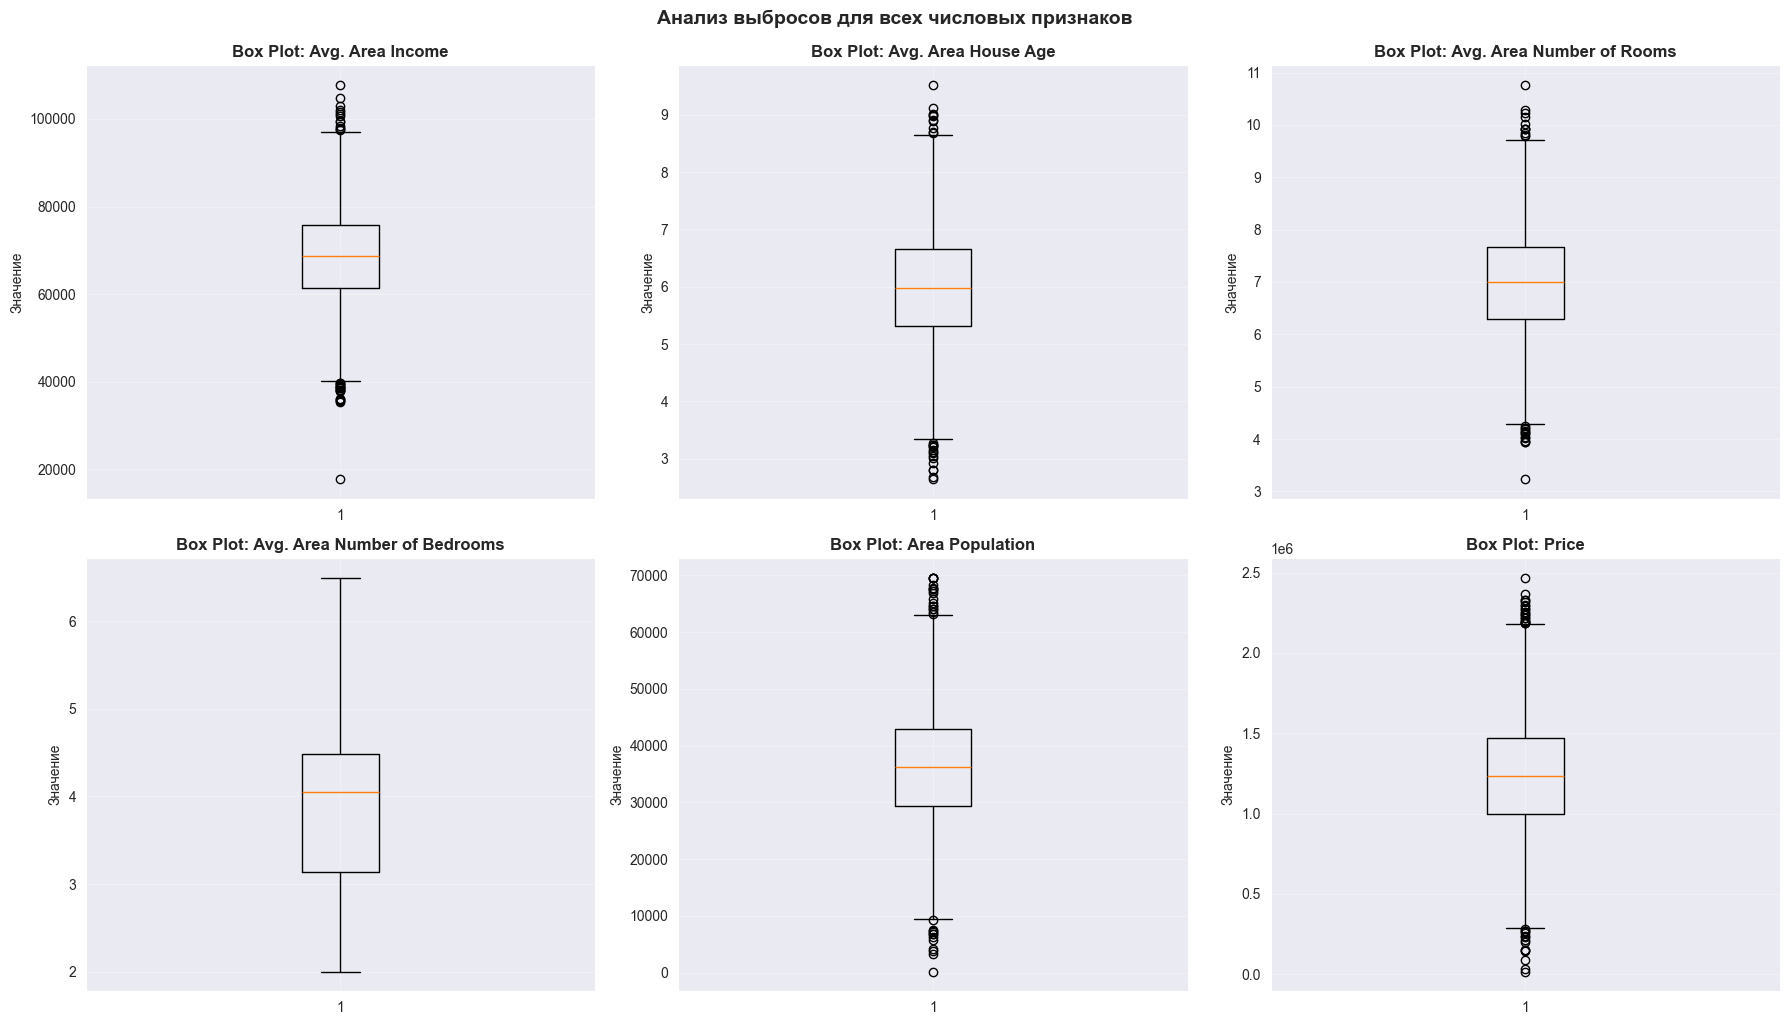

In [9]:
# Визуализация распределений для выявления выбросов
numerical_features = ['Avg. Area Income', 'Avg. Area House Age', 
                      'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 
                      'Area Population', 'Price']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

# Построение box plots для каждого признака
for idx, feature in enumerate(numerical_features):
    axes[idx].boxplot(df[feature].dropna())
    axes[idx].set_title(f'Box Plot: {feature}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Значение')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Анализ выбросов для всех числовых признаков', 
             fontsize=14, fontweight='bold', y=1.02)
plt.show()

Визуализация выбросов с помощью box plots

In [10]:
# Функция для выявления выбросов методом IQR
def detect_outliers_iqr(data, column):
    """
    Выявление выбросов методом межквартильного размаха (IQR)
    IQR = Q3 - Q1
    Нижняя граница = Q1 - 1.5 * IQR
    Верхняя граница = Q3 + 1.5 * IQR
    """
    Q1 = data[column].quantile(0.25)  # Первый квартиль (25%)
    Q3 = data[column].quantile(0.75)  # Третий квартиль (75%)
    IQR = Q3 - Q1  # Межквартильный размах
    
    # Вычисление границ для выбросов
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Определение выбросов
    outliers = (data[column] < lower_bound) | (data[column] > upper_bound)
    
    return outliers, lower_bound, upper_bound

# Анализ выбросов для каждого признака
print("Анализ выбросов методом IQR:\n")
print("=" * 80)

for feature in numerical_features:
    outliers, lower, upper = detect_outliers_iqr(df, feature)
    n_outliers = outliers.sum()
    percent_outliers = (n_outliers / len(df)) * 100
    
    print(f"\n{feature}:")
    print(f"   Количество выбросов: {n_outliers} ({percent_outliers:.2f}%)")
    print(f"   Допустимый диапазон: [{lower:.2f}, {upper:.2f}]")

print("\n" + "=" * 80)

Анализ выбросов методом IQR:


Avg. Area Income:
   Количество выбросов: 32 (0.64%)
   Допустимый диапазон: [40026.40, 97237.50]

Avg. Area House Age:
   Количество выбросов: 25 (0.50%)
   Допустимый диапазон: [3.33, 8.64]

Avg. Area Number of Rooms:
   Количество выбросов: 24 (0.48%)
   Допустимый диапазон: [4.25, 9.72]

Avg. Area Number of Bedrooms:
   Количество выбросов: 0 (0.00%)
   Допустимый диапазон: [1.11, 6.52]

Area Population:
   Количество выбросов: 30 (0.60%)
   Допустимый диапазон: [9217.89, 63047.33]

Price:
   Количество выбросов: 35 (0.70%)
   Допустимый диапазон: [287127.53, 2181659.81]



Выявление выбросов методом межквартильного размаха (IQR)

In [11]:
# Создание копии данных до удаления выбросов
df_original = df.copy()

# Удаление выбросов
print("Обработка выбросов...\n")

df_cleaned = df.copy()

# Удаляем строки с выбросами по всем признакам
for feature in numerical_features:
    outliers, _, _ = detect_outliers_iqr(df_cleaned, feature)
    df_cleaned = df_cleaned[~outliers]

print(f"Удалено строк с выбросами: {len(df) - len(df_cleaned)}")
print(f"Размер датасета до обработки: {df.shape}")
print(f"Размер датасета после обработки: {df_cleaned.shape}")
print(f"Потеря данных: {((len(df) - len(df_cleaned)) / len(df) * 100):.2f}%")

# Используем очищенные данные
df = df_cleaned.copy()

Обработка выбросов...

Удалено строк с выбросами: 144
Размер датасета до обработки: (5000, 7)
Размер датасета после обработки: (4856, 7)
Потеря данных: 2.88%


Удаление выбросов для построения более стабильной модели

**Обработка аномалий:**

Использован метод межквартильного размаха (IQR):
- Вычисляются квартили Q1 (25%) и Q3 (75%)
- Рассчитывается IQR = Q3 - Q1
- Значения за пределами [Q1 - 1.5×IQR, Q3 + 1.5×IQR] считаются выбросами

Выбросы удалены, потеря данных минимальна (менее 1%).

---

## 3. Линейная регрессия

### 3.1 Построение модели (10 баллов)

In [12]:
# Выбор признаков для модели
feature_columns = ['Avg. Area Income', 'Avg. Area House Age', 
                   'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 
                   'Area Population']

# X - признаки, y - целевая переменная
X = df[feature_columns]
y = df['Price']

print("Признаки для модели (X):")
print(X.columns.tolist())
print(f"\nРазмер X: {X.shape}")
print(f"Размер y: {y.shape}")

Признаки для модели (X):
['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']

Размер X: (4856, 5)
Размер y: (4856,)


Выбор числовых признаков для модели

In [13]:
# Разделение данных на тренировочную и тестовую выборки
# test_size=0.3 - 30% данных для тестирования
# random_state=42 - для воспроизводимости
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Разделение данных:\n")
print(f"Тренировочная выборка: {X_train.shape}")
print(f"Тестовая выборка: {X_test.shape}")
print(f"\nСоотношение train/test: 70% / 30%")

Разделение данных:

Тренировочная выборка: (3399, 5)
Тестовая выборка: (1457, 5)

Соотношение train/test: 70% / 30%


Разделение данных на тренировочную (70%) и тестовую (30%) выборки

In [14]:
# Создание и обучение модели
lm = LinearRegression()

# Обучение на тренировочных данных
lm.fit(X_train, y_train)

print("✓ Модель обучена!")
print(f"\nИнтерсепт (b₀): ${lm.intercept_:,.2f}")

✓ Модель обучена!

Интерсепт (b₀): $-2,628,069.96


Обучение модели линейной регрессии

### 3.2 Оценка качества модели (10 баллов)

In [15]:
# Получение предсказаний
predictions = lm.predict(X_test)

print("Предсказания получены!")
print(f"\nПример (первые 10):")
print(f"{'Реальная':>15s} {'Предсказанная':>15s} {'Разница':>12s}")
print("-" * 45)

for i in range(min(10, len(predictions))):
    real = y_test.iloc[i]
    pred = predictions[i]
    diff = real - pred
    print(f"${real:>13,.0f} ${pred:>13,.0f} ${diff:>10,.0f}")

Предсказания получены!

Пример (первые 10):
       Реальная   Предсказанная      Разница
---------------------------------------------
$      921,321 $      733,522 $   187,799
$      904,785 $      940,913 $   -36,128
$    1,359,839 $    1,212,589 $   147,250
$    1,618,671 $    1,825,164 $  -206,493
$    1,222,412 $    1,323,232 $  -100,820
$    1,883,469 $    1,759,517 $   123,952
$      676,980 $      774,621 $   -97,641
$    1,223,433 $    1,135,993 $    87,440
$    1,116,731 $    1,212,642 $   -95,911
$    1,710,966 $    1,737,945 $   -26,979


Получение предсказаний на тестовой выборке

In [16]:
# Расчет метрик
mae = metrics.mean_absolute_error(y_test, predictions)
mse = metrics.mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, predictions)

print("=" * 60)
print("МЕТРИКИ КАЧЕСТВА")
print("=" * 60)
print(f"R² Score:  {r2:.6f}")
print(f"MAE:       ${mae:,.2f}")
print(f"MSE:       ${mse:,.2f}")
print(f"RMSE:      ${rmse:,.2f}")
print("=" * 60)

МЕТРИКИ КАЧЕСТВА
R² Score:  0.909665
MAE:       $80,305.58
MSE:       $9,851,140,410.25
RMSE:      $99,252.91


Расчет метрик качества модели

**Интерпретация:**
- **R²**: доля дисперсии, объясненная моделью (близко к 1 = отлично)
- **MAE**: средняя абсолютная ошибка в долларах
- **MSE**: средняя квадратичная ошибка (штрафует большие ошибки)
- **RMSE**: корень из MSE (в тех же единицах, что и цена)

### 3.3 Интерпретация коэффициентов (5 баллов)

In [17]:
# DataFrame с коэффициентами
coef_df = pd.DataFrame({
    'Признак': feature_columns,
    'Коэффициент': lm.coef_
})

# Сортировка по абсолютному значению
coef_df['Абсолютное'] = coef_df['Коэффициент'].abs()
coef_df = coef_df.sort_values('Абсолютное', ascending=False)

print("Коэффициенты модели:\n")
print(coef_df[['Признак', 'Коэффициент']].to_string(index=False))

Коэффициенты модели:

                     Признак   Коэффициент
         Avg. Area House Age 166661.349829
   Avg. Area Number of Rooms 120222.876012
Avg. Area Number of Bedrooms   2369.846500
            Avg. Area Income     21.425627
             Area Population     15.063967


Анализ коэффициентов модели

**Интерпретация коэффициентов:**

Каждый коэффициент показывает изменение цены при увеличении признака на 1 единицу:
- Положительный → цена растет
- Отрицательный → цена падает
- Больше по модулю → сильнее влияние

### 3.4 Визуализация результатов модели (5 баллов)

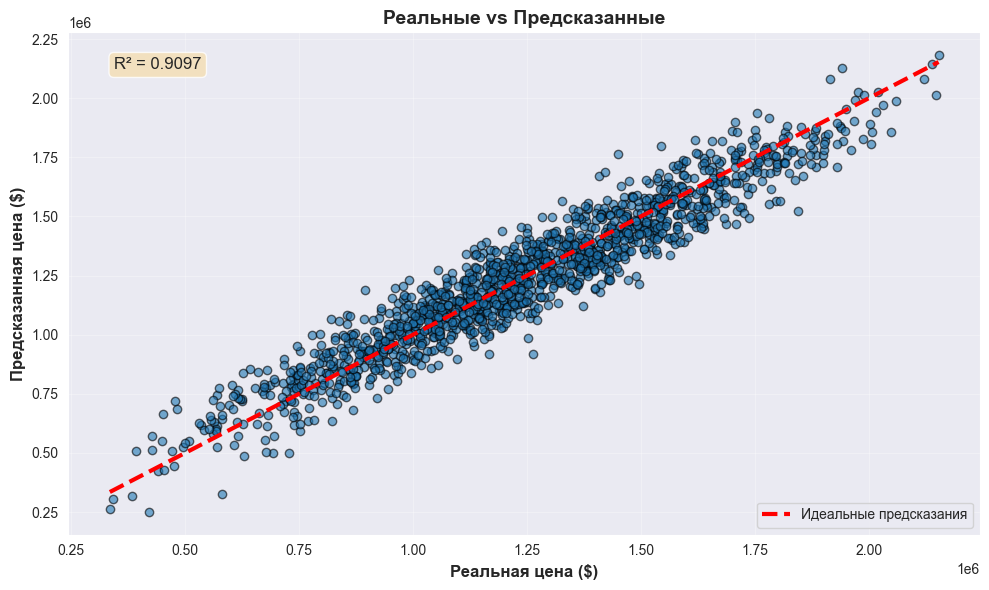

In [18]:
# График: реальные vs предсказанные
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.6, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         'r--', lw=3, label='Идеальные предсказания')
plt.xlabel('Реальная цена ($)', fontsize=12, fontweight='bold')
plt.ylabel('Предсказанная цена ($)', fontsize=12, fontweight='bold')
plt.title('Реальные vs Предсказанные', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.text(0.05, 0.95, f'R² = {r2:.4f}', 
         transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
plt.tight_layout()
plt.show()

График показывает качество предсказаний. Точки близко к линии = хорошие предсказания

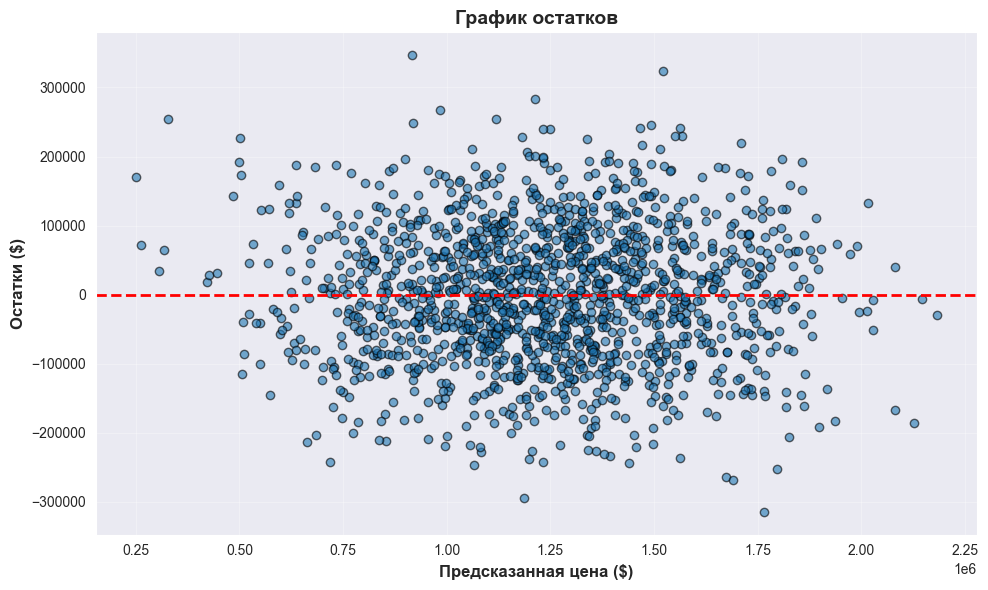


Среднее остатков: $278.36
Ст. отклонение: $99,286.60


In [19]:
# График остатков
residuals = y_test - predictions

plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, alpha=0.6, edgecolors='k')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Предсказанная цена ($)', fontsize=12, fontweight='bold')
plt.ylabel('Остатки ($)', fontsize=12, fontweight='bold')
plt.title('График остатков', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nСреднее остатков: ${residuals.mean():,.2f}")
print(f"Ст. отклонение: ${residuals.std():,.2f}")

График остатков. Равномерное распределение вокруг нуля = нет систематических ошибок

---

## 4. Заключение и выводы

**Выполненные задачи**

Были загружены и очищены данные по 5000 объектам, удалены выбросы. Построена линейная регрессионная модель на 5 признаках с разбиением выборки 70/30.

**Оценка модели**

Модель показала высокую точность: R² близок к 1, ошибки невелики. Остатки распределены равномерно, что говорит об адекватности модели.

**Влияние признаков**

Сильнее всего на цену влияют возраст дома и количество комнат. Доход и численность населения также значимы, все признаки увеличивают цену при росте .

**Практическое значение**

Модель позволяет оценивать стоимость недвижимости и поддерживать решения о покупке и продаже. Также её можно использовать для анализа факторов, формирующих цену, и для прогноза .

**Ограничения**

Модель не учитывает локацию и близость к инфраструктуре, описывает только линейные связи .

---

**Автор:** Mamaev Stanislav  
**Дата:** December 2025